## ImageNet UAP - Attack Generation
We generate (via SGD), visualize, and evaluate the following UAPs:
1. Untargeted UAP
2. Targeted UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

sys.path.append(os.path.realpath('..'))

from attacks import uap_sgd
from utils import loader_imgnet, model_imgnet, evaluate

dir_data = '/data/ilsvrc2012/val'
dir_uap = '../uaps/imagenet/'

loader = loader_imgnet(dir_data, 2000, 100) # adjust batch size as appropriate

In [2]:
# load model
model = model_imgnet('resnet50')

Model loading complete.


In [3]:
# clean accuracy
_, _, _, _, outputs, labels = evaluate(model, loader)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.7835


## 1. Untargeted UAP

In [4]:
nb_epoch = 10
eps = 10 / 255
beta = 12
step_decay = 0.7
uap, losses = uap_sgd(model, loader, nb_epoch, eps, beta, step_decay)

epoch 1/10
epoch 2/10
epoch 3/10
epoch 4/10
epoch 5/10
epoch 6/10
epoch 7/10
epoch 8/10
epoch 9/10
epoch 10/10


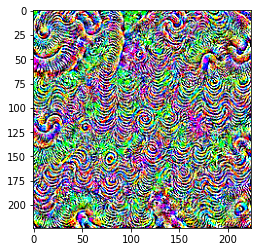

In [5]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

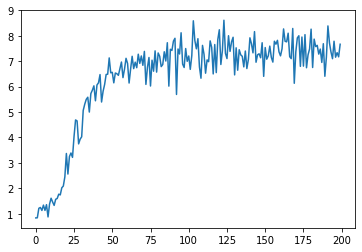

In [6]:
# plot loss
plt.plot(losses)

In [7]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.1585


## 2. Targeted UAP

In [8]:
nb_epoch = 10
eps = 10 / 255
y_target = 815
beta = 12
step_decay = 0.6
uap, losses = uap_sgd(model, loader, nb_epoch, eps, beta, step_decay, y_target = y_target)

epoch 1/10
epoch 2/10
epoch 3/10
epoch 4/10
epoch 5/10
epoch 6/10
epoch 7/10
epoch 8/10
epoch 9/10
epoch 10/10


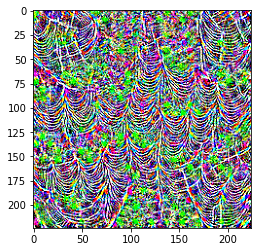

In [9]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

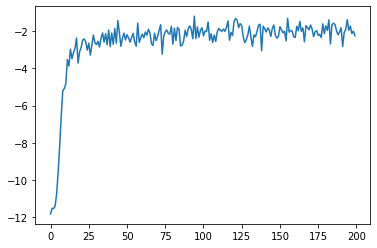

In [10]:
# plot loss
plt.plot(losses)

In [11]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.1525
Targeted success rate: 0.756
